In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.cluster import KMeans

# Load images from directory
def load_images_from_folder(folder, img_size=(64, 64)):
    images = []
    labels = []
    class_names = os.listdir(folder)

    for label, class_name in enumerate(class_names):
        class_path = os.path.join(folder, class_name)
        if not os.path.isdir(class_path):
            continue
        for file in os.listdir(class_path):
            img_path = os.path.join(class_path, file)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, img_size)
                img = img / 255.0  # Normalize
                images.append(img)
                labels.append(label)

    return np.array(images), np.array(labels), class_names

# Load dataset
folder_path = "path_to_your_images"
X, y, class_names = load_images_from_folder(folder_path)

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encoding labels for supervised learning
y_train_cat = to_categorical(y_train, num_classes=len(class_names))
y_test_cat = to_categorical(y_test, num_classes=len(class_names))

# Build CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_cat, epochs=10, validation_data=(X_test, y_test_cat), batch_size=32)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print(f"Test Accuracy: {test_acc:.2f}")

# -------------------------
# Unsupervised Learning
# -------------------------

# Flatten images for clustering
X_flattened = X.reshape(X.shape[0], -1)

# Apply K-Means
k = len(class_names)  # Number of clusters (same as number of classes)
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X_flattened)

# Plot some clustered images
fig, axes = plt.subplots(1, 5, figsize=(12, 6))
for i, ax in enumerate(axes):
    ax.imshow(X[i])
    ax.set_title(f"Cluster {labels[i]}")
    ax.axis('off')
plt.show()

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'path_to_your_images'

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 204s 1us/step


C:\Users\Student\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training CNN (this may take several minutes)...
Epoch 1/10
782/782 - 25s - 32ms/step - accuracy: 0.4095 - loss: 1.6311 - val_accuracy: 0.5159 - val_loss: 1.3940
Epoch 2/10
782/782 - 36s - 46ms/step - accuracy: 0.5427 - loss: 1.2960 - val_accuracy: 0.6021 - val_loss: 1.1252
Epoch 3/10
782/782 - 18s - 23ms/step - accuracy: 0.5869 - loss: 1.1734 - val_accuracy: 0.6070 - val_loss: 1.1122
Epoch 4/10
782/782 - 18s - 23ms/step - accuracy: 0.6156 - loss: 1.0924 - val_accuracy: 0.6722 - val_loss: 0.9558
Epoch 5/10
782/782 - 18s - 23ms/step - accuracy: 0.6429 - loss: 1.0212 - val_accuracy: 0.6717 - val_loss: 0.9422
Epoch 6/10
782/782 - 20s - 26ms/step - accuracy: 0.6595 - loss: 0.9741 - val_accuracy: 0.6871 - val_loss: 0.9074
Epoch 7/10
782/782 - 19s - 24ms/step - accuracy: 0.6757 - loss: 0.9296 - val_accuracy: 0.6937 - val_loss: 0.8784
Epoch 8/10
782/782 - 20s - 26ms/step - accuracy: 0.6863 - loss: 0.8964 - val_accuracy: 0.6916 - val_loss: 0.8794
Epoch 9/10
782/782 - 20s - 25ms/step - accuracy:

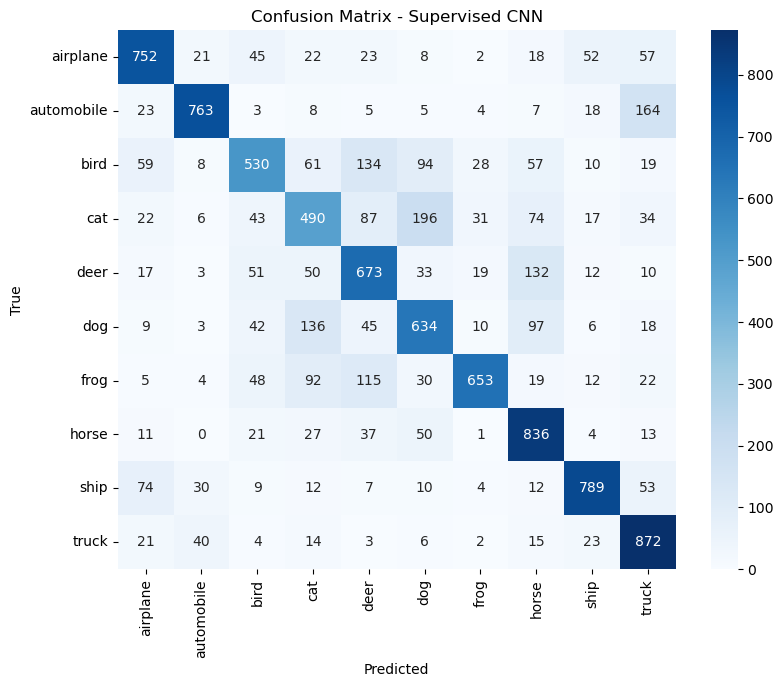

Adjusted Rand Index (ARI): 0.0430
Normalized Mutual Information (NMI): 0.0850
Silhouette Score (on PCA features): 0.0659

Cluster -> majority true label mapping (cluster: label_name):
  Cluster 0: frog
  Cluster 1: ship
  Cluster 2: bird
  Cluster 3: frog
  Cluster 4: airplane
  Cluster 5: deer
  Cluster 6: airplane
  Cluster 7: dog
  Cluster 8: truck
  Cluster 9: truck


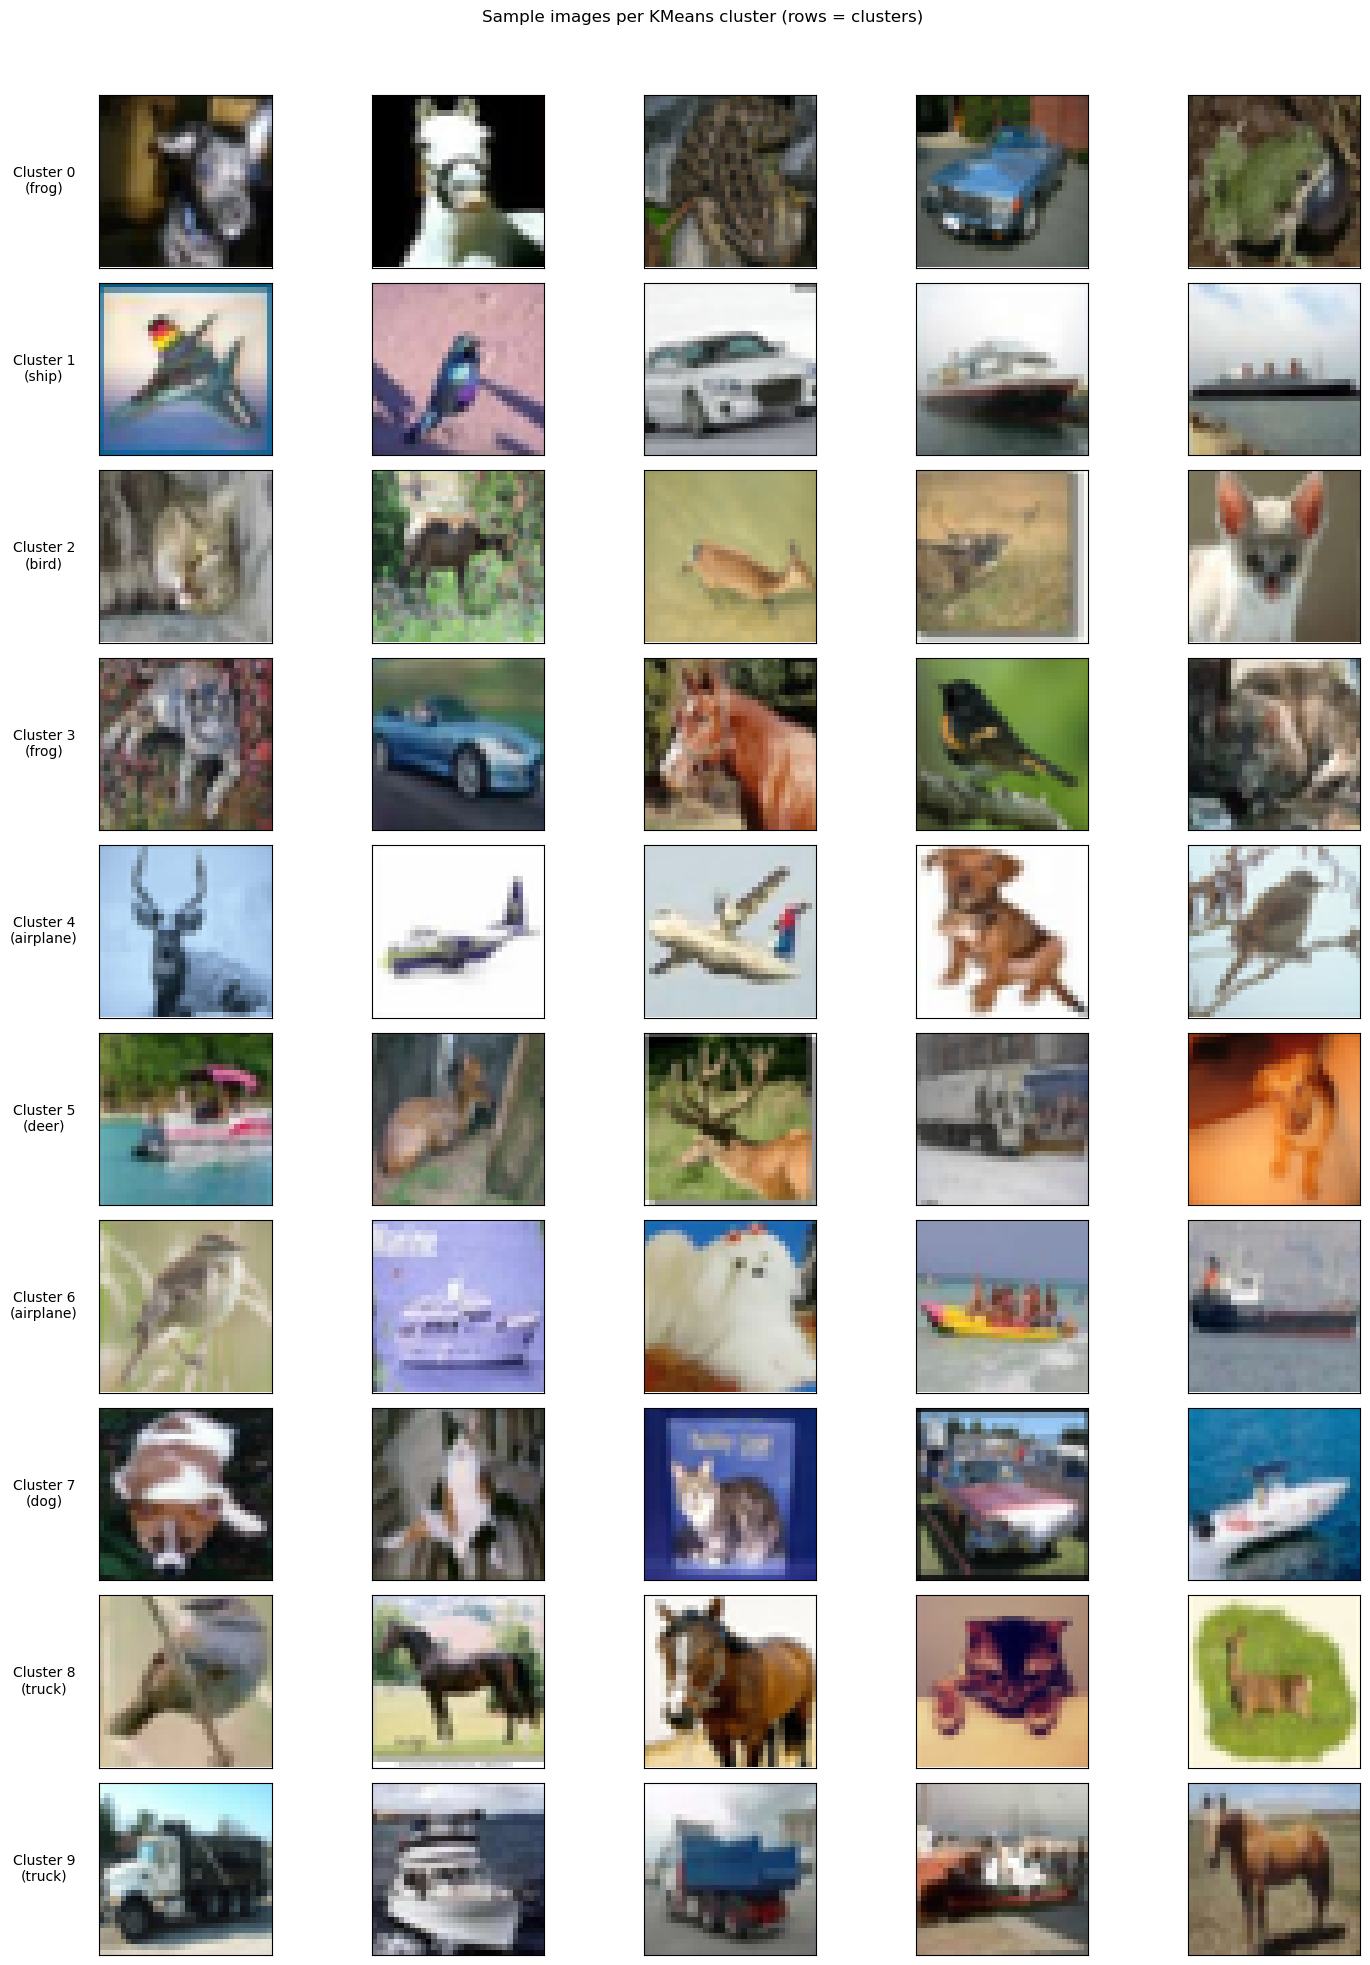


Counts of true label vs cluster (rows=true labels):
cluster    0    1    2    3    4    5    6    7    8    9
true                                                     
0         35  130   57   39  211   30  223   90   94   91
1        115   99   97  136   49   54   30  163   85  172
2        125   34  242  178   84   67  107   64   52   47
3        132   20  156  173   62  142   58  108   82   67
4        140   22  235  222   23  166   52   44   36   60
5         94   23  167  116   37  159   98  190   71   45
6        226    9  209  229   43   72   11   83   86   32
7         63   46  179  130   29  141   46   79  122  165
8         33  287   40   27   40   40  142  132   26  233
9         23  167   66  125   43   30   26   68  127  325


In [7]:
# CIFAR-10: supervised CNN + unsupervised KMeans + clustering evaluation
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import (
    adjusted_rand_score,
    normalized_mutual_info_score,
    silhouette_score,
    accuracy_score,
    confusion_matrix,
    classification_report
)
import seaborn as sns

# -------------------------
# Load and prepare data
# -------------------------
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = y_train.ravel()
y_test = y_test.ravel()
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

# Normalize
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode for supervised training
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

# -------------------------
# Supervised: simple CNN
# -------------------------
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print("Training CNN (this may take several minutes)...")
model.fit(X_train, y_train_cat, epochs=10, batch_size=64, validation_data=(X_test, y_test_cat), verbose=2)

# Evaluate supervised model
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)
supervised_acc = accuracy_score(y_test, y_pred)
print(f"\nSupervised classification accuracy: {supervised_acc:.4f}\n")
print("Classification report (supervised):")
print(classification_report(y_test, y_pred, target_names=class_names))

# Confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Supervised CNN')
plt.show()

# -------------------------
# Unsupervised: KMeans on PCA features
# -------------------------
# Flatten images
X_all = X_test.reshape(X_test.shape[0], -1)

# PCA to reduce dimensionality before clustering
pca = PCA(n_components=50, random_state=42)
X_pca = pca.fit_transform(X_all)

# KMeans clustering
k = 10
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_pca)

# -------------------------
# Clustering evaluation
# -------------------------
ari = adjusted_rand_score(y_test, cluster_labels)
nmi = normalized_mutual_info_score(y_test, cluster_labels)
# silhouette_score requires at least 2 clusters and can be expensive; compute on PCA features
sil_score = silhouette_score(X_pca, cluster_labels)

print(f"Adjusted Rand Index (ARI): {ari:.4f}")
print(f"Normalized Mutual Information (NMI): {nmi:.4f}")
print(f"Silhouette Score (on PCA features): {sil_score:.4f}")

# Map clusters to most common true label per cluster (for rough interpretability)
from collections import Counter, defaultdict
cluster_to_labels = defaultdict(list)
for cl, true in zip(cluster_labels, y_test):
    cluster_to_labels[cl].append(true)

cluster_majority = {cl: Counter(labels).most_common(1)[0][0] for cl, labels in cluster_to_labels.items()}
print("\nCluster -> majority true label mapping (cluster: label_name):")
for cl in sorted(cluster_majority):
    print(f"  Cluster {cl}: {class_names[cluster_majority[cl]]}")

# -------------------------
# Visualize clusters (sample images per cluster)
# -------------------------
samples_per_cluster = 5
plt.figure(figsize=(15, 2 * k))
for cl in range(k):
    idxs = np.where(cluster_labels == cl)[0]
    if len(idxs) == 0:
        continue
    chosen = np.random.choice(idxs, min(samples_per_cluster, len(idxs)), replace=False)
    for i, idx in enumerate(chosen):
        plt_idx = cl * samples_per_cluster + i + 1
        ax = plt.subplot(k, samples_per_cluster, plt_idx)
        ax.imshow(X_test[idx])
        ax.set_xticks([])
        ax.set_yticks([])
        if i == 0:
            ax.set_ylabel(f"Cluster {cl}\n({class_names[cluster_majority.get(cl,0)]})", rotation=0, labelpad=40, va='center')
plt.suptitle("Sample images per KMeans cluster (rows = clusters)")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# -------------------------
# Optional: compare supervised predictions vs cluster assignments
# -------------------------
# Create a small table showing how many images in each (true_label, cluster) pair
import pandas as pd
df = pd.DataFrame({'true': y_test, 'cluster': cluster_labels, 'pred': y_pred})
pivot = pd.crosstab(df['true'], df['cluster'])
print("\nCounts of true label vs cluster (rows=true labels):")
print(pivot)

C:\Users\Student\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training CNN (this may take several minutes)...
Epoch 1/10
782/782 - 19s - 25ms/step - accuracy: 0.4018 - loss: 1.6420 - val_accuracy: 0.5486 - val_loss: 1.2817
Epoch 2/10
782/782 - 19s - 24ms/step - accuracy: 0.5299 - loss: 1.3201 - val_accuracy: 0.5878 - val_loss: 1.1723
Epoch 3/10
782/782 - 20s - 25ms/step - accuracy: 0.5770 - loss: 1.2016 - val_accuracy: 0.6192 - val_loss: 1.1182
Epoch 4/10
782/782 - 20s - 26ms/step - accuracy: 0.6062 - loss: 1.1212 - val_accuracy: 0.6517 - val_loss: 1.0003
Epoch 5/10
782/782 - 18s - 23ms/step - accuracy: 0.6284 - loss: 1.0652 - val_accuracy: 0.6673 - val_loss: 0.9480
Epoch 6/10
782/782 - 20s - 26ms/step - accuracy: 0.6401 - loss: 1.0217 - val_accuracy: 0.6753 - val_loss: 0.9479
Epoch 7/10
782/782 - 18s - 22ms/step - accuracy: 0.6577 - loss: 0.9758 - val_accuracy: 0.6835 - val_loss: 0.9103
Epoch 8/10
782/782 - 19s - 24ms/step - accuracy: 0.6706 - loss: 0.9338 - val_accuracy: 0.6883 - val_loss: 0.9013
Epoch 9/10
782/782 - 18s - 23ms/step - accuracy:

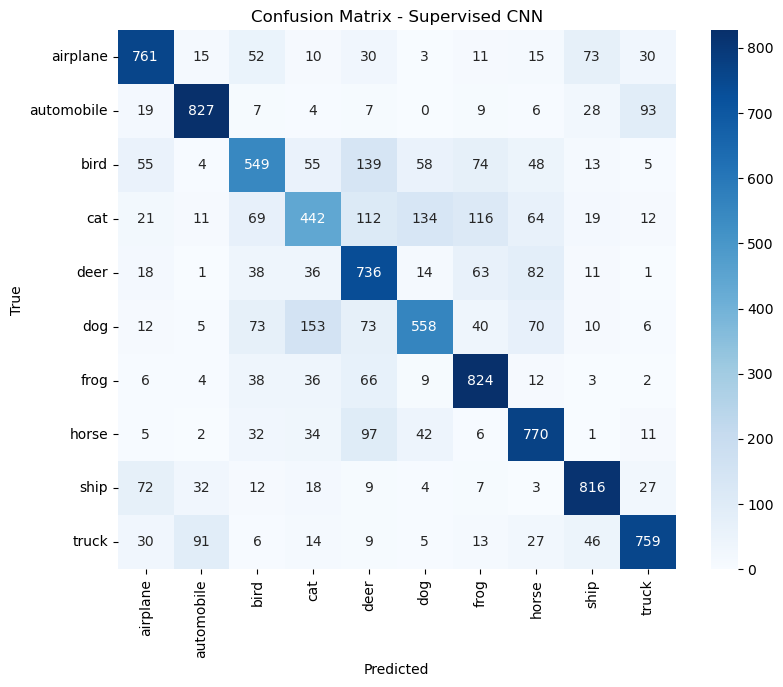

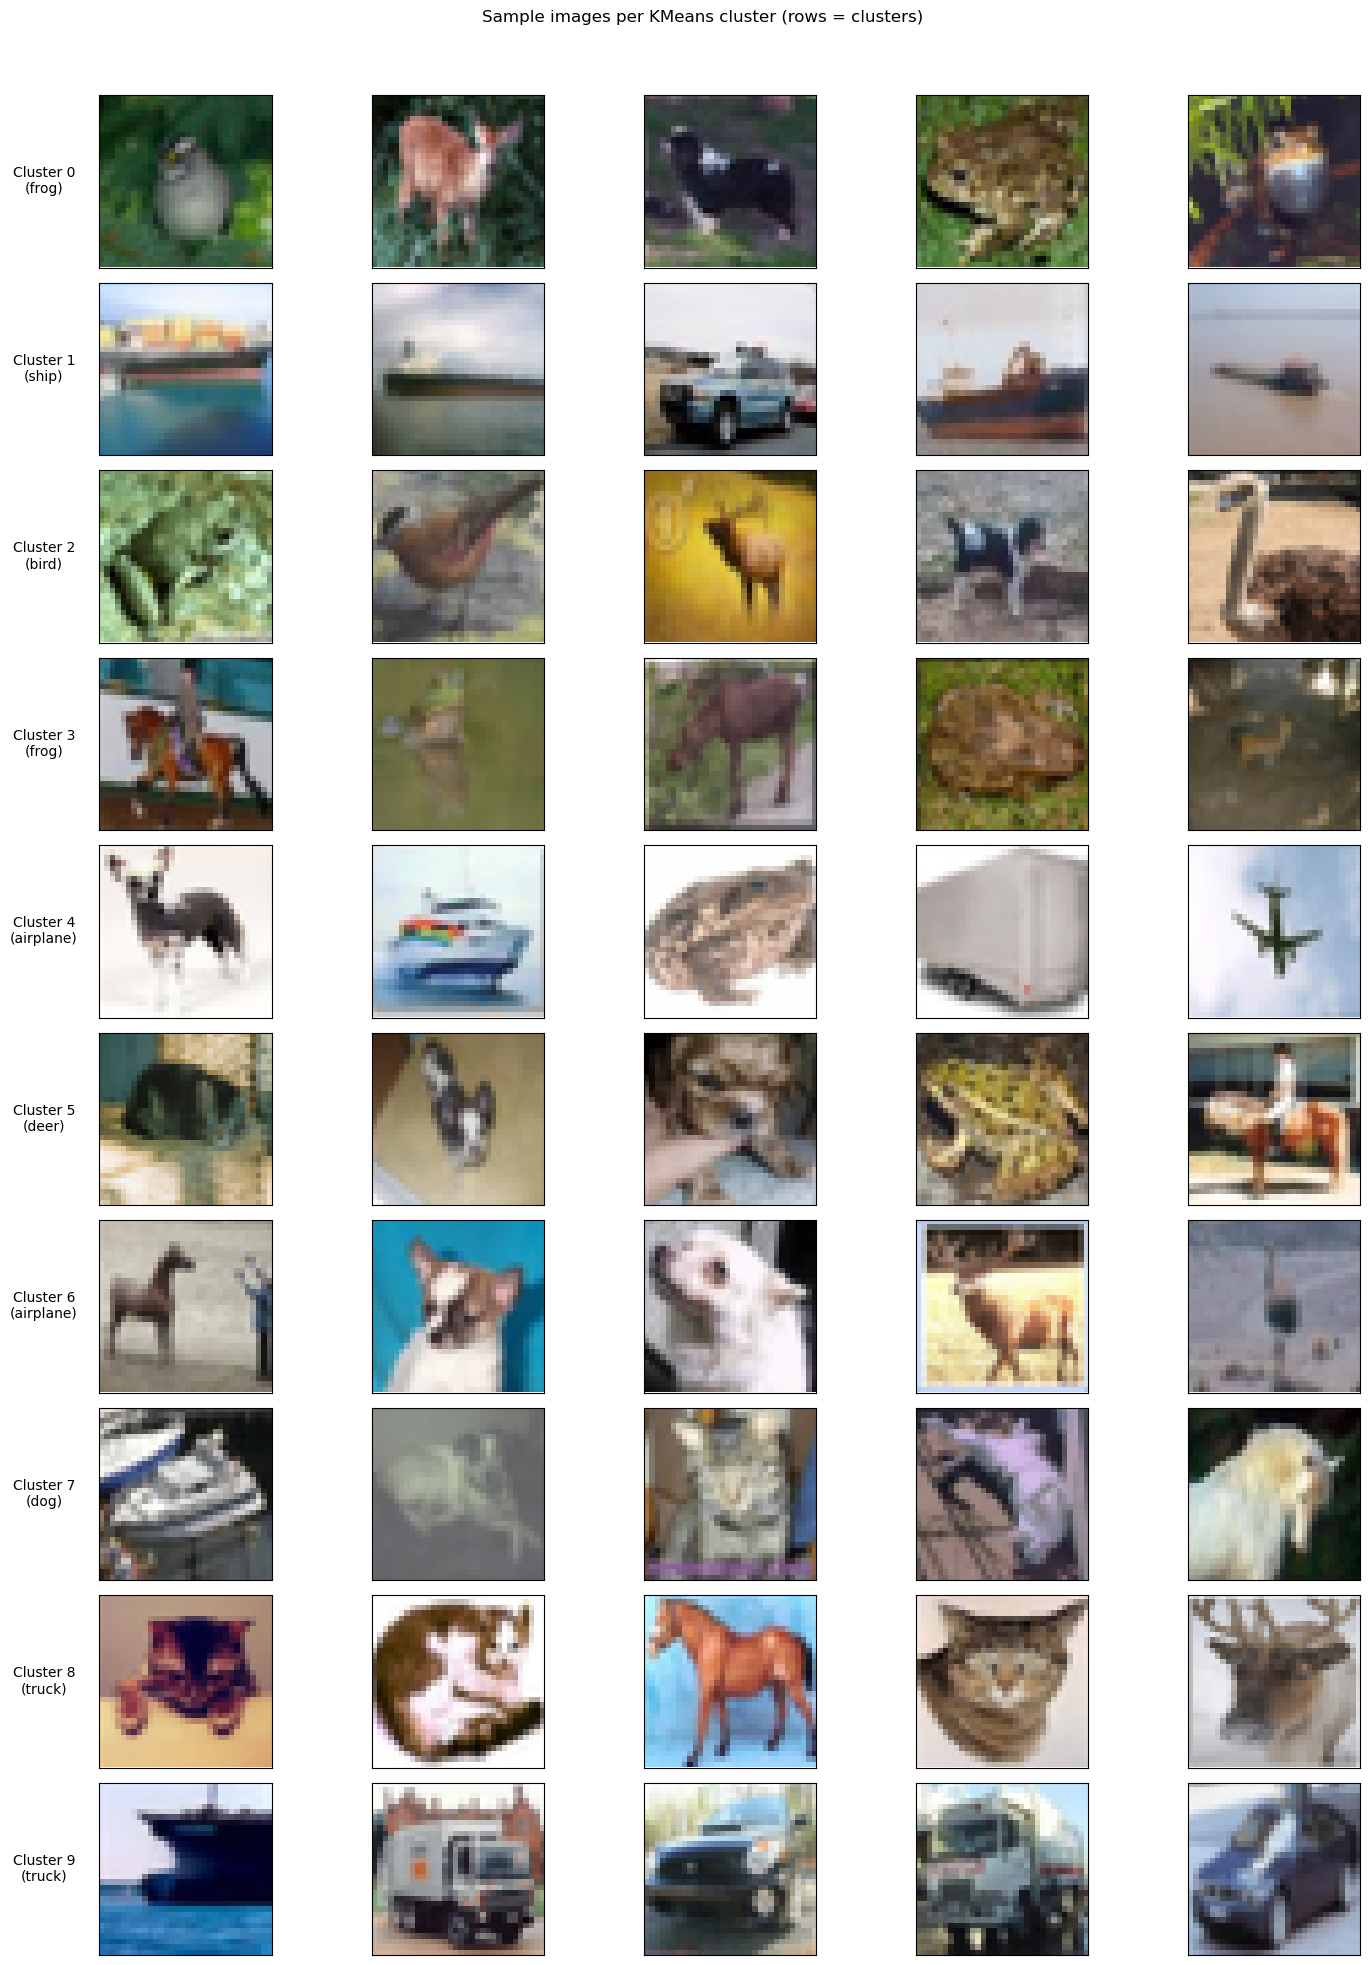


--- Final comparison ---
Supervised CNN accuracy: 0.7042
KMeans clustering (mapped) accuracy: 0.2226
ARI: 0.0430, NMI: 0.0850, Silhouette: 0.0659

Best method for image classification on CIFAR-10: **Supervised CNN** (higher accuracy and direct label learning).

Comparison table:
            method  accuracy  ARI_or_NA  NMI_or_NA
0   Supervised CNN    0.7042        NaN        NaN
1  KMeans (mapped)    0.2226   0.043011    0.08505


In [9]:
# CIFAR-10: supervised CNN vs KMeans clustering with direct comparison
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import (
    adjusted_rand_score,
    normalized_mutual_info_score,
    silhouette_score,
    accuracy_score,
    classification_report,
    confusion_matrix
)
from collections import Counter, defaultdict
import seaborn as sns
import pandas as pd

# -------------------------
# Load and prepare data
# -------------------------
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = y_train.ravel()
y_test = y_test.ravel()
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

# Normalize
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode for supervised training
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

# -------------------------
# Supervised: simple CNN
# -------------------------
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print("Training CNN (this may take several minutes)...")
model.fit(X_train, y_train_cat, epochs=10, batch_size=64, validation_data=(X_test, y_test_cat), verbose=2)

# Evaluate supervised model
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)
supervised_acc = accuracy_score(y_test, y_pred)
print(f"\nSupervised classification accuracy: {supervised_acc:.4f}\n")
print("Classification report (supervised):")
print(classification_report(y_test, y_pred, target_names=class_names))

# -------------------------
# Unsupervised: KMeans on PCA features
# -------------------------
# Flatten images
X_all = X_test.reshape(X_test.shape[0], -1)

# PCA to reduce dimensionality before clustering
pca = PCA(n_components=50, random_state=42)
X_pca = pca.fit_transform(X_all)

# KMeans clustering
k = 10
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_pca)

# -------------------------
# Clustering evaluation metrics
# -------------------------
ari = adjusted_rand_score(y_test, cluster_labels)
nmi = normalized_mutual_info_score(y_test, cluster_labels)
sil_score = silhouette_score(X_pca, cluster_labels)

print(f"Adjusted Rand Index (ARI): {ari:.4f}")
print(f"Normalized Mutual Information (NMI): {nmi:.4f}")
print(f"Silhouette Score (on PCA features): {sil_score:.4f}")

# -------------------------
# Map clusters to labels and compute clustering accuracy
# -------------------------
cluster_to_labels = defaultdict(list)
for cl, true in zip(cluster_labels, y_test):
    cluster_to_labels[cl].append(true)

cluster_majority = {cl: Counter(labels).most_common(1)[0][0] for cl, labels in cluster_to_labels.items()}

# Create predicted labels from clusters by mapping each cluster to its majority true label
cluster_based_pred = np.array([cluster_majority[cl] for cl in cluster_labels])
clustering_accuracy = accuracy_score(y_test, cluster_based_pred)
print(f"\nClustering-based accuracy (majority-vote mapping): {clustering_accuracy:.4f}")

# Show mapping
print("\nCluster -> majority true label mapping (cluster: label_name):")
for cl in sorted(cluster_majority):
    print(f"  Cluster {cl}: {class_names[cluster_majority[cl]]}")

# -------------------------
# Visualizations
# -------------------------
# Confusion matrix for supervised model
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Supervised CNN')
plt.show()

# Sample images per cluster (rows = clusters)
samples_per_cluster = 5
plt.figure(figsize=(15, 2 * k))
for cl in range(k):
    idxs = np.where(cluster_labels == cl)[0]
    if len(idxs) == 0:
        continue
    chosen = np.random.choice(idxs, min(samples_per_cluster, len(idxs)), replace=False)
    for i, idx in enumerate(chosen):
        plt_idx = cl * samples_per_cluster + i + 1
        ax = plt.subplot(k, samples_per_cluster, plt_idx)
        ax.imshow(X_test[idx])
        ax.set_xticks([])
        ax.set_yticks([])
        if i == 0:
            ax.set_ylabel(f"Cluster {cl}\n({class_names[cluster_majority.get(cl,0)]})", rotation=0, labelpad=40, va='center')
plt.suptitle("Sample images per KMeans cluster (rows = clusters)")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# -------------------------
# Final comparison and verdict
# -------------------------
print("\n--- Final comparison ---")
print(f"Supervised CNN accuracy: {supervised_acc:.4f}")
print(f"KMeans clustering (mapped) accuracy: {clustering_accuracy:.4f}")
print(f"ARI: {ari:.4f}, NMI: {nmi:.4f}, Silhouette: {sil_score:.4f}")

if supervised_acc > clustering_accuracy:
    print("\nBest method for image classification on CIFAR-10: **Supervised CNN** (higher accuracy and direct label learning).")
elif clustering_accuracy > supervised_acc:
    print("\nBest method for image classification on CIFAR-10: **KMeans clustering with mapping** (unexpected but possible on this run).")
else:
    print("\nBoth methods achieved equal accuracy on this run.")

# Optional: show a small table comparing metrics
df_compare = pd.DataFrame({
    'method': ['Supervised CNN', 'KMeans (mapped)'],
    'accuracy': [supervised_acc, clustering_accuracy],
    'ARI_or_NA': [np.nan, ari],
    'NMI_or_NA': [np.nan, nmi]
})
print("\nComparison table:")
print(df_compare)

Epoch 1/10
782/782 - 19s - 25ms/step - accuracy: 0.3758 - loss: 1.7020 - val_accuracy: 0.5183 - val_loss: 1.3374
Epoch 2/10
782/782 - 18s - 23ms/step - accuracy: 0.5127 - loss: 1.3628 - val_accuracy: 0.6025 - val_loss: 1.1650
Epoch 3/10
782/782 - 23s - 29ms/step - accuracy: 0.5675 - loss: 1.2297 - val_accuracy: 0.6298 - val_loss: 1.0701
Epoch 4/10
782/782 - 22s - 28ms/step - accuracy: 0.5911 - loss: 1.1547 - val_accuracy: 0.6547 - val_loss: 0.9976
Epoch 5/10
782/782 - 19s - 24ms/step - accuracy: 0.6188 - loss: 1.0804 - val_accuracy: 0.6644 - val_loss: 0.9657
Epoch 6/10
782/782 - 18s - 23ms/step - accuracy: 0.6339 - loss: 1.0381 - val_accuracy: 0.6628 - val_loss: 0.9683
Epoch 7/10
782/782 - 18s - 23ms/step - accuracy: 0.6514 - loss: 0.9893 - val_accuracy: 0.6825 - val_loss: 0.9202
Epoch 8/10
782/782 - 21s - 27ms/step - accuracy: 0.6666 - loss: 0.9487 - val_accuracy: 0.6876 - val_loss: 0.8992
Epoch 9/10
782/782 - 21s - 26ms/step - accuracy: 0.6763 - loss: 0.9185 - val_accuracy: 0.6915 - 

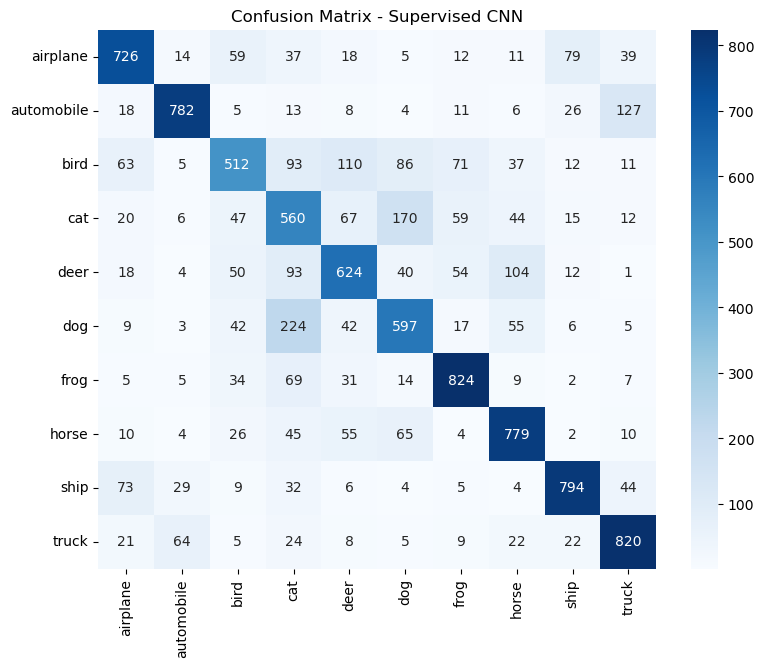

ROC AUC (micro): 0.9585, (macro): 0.9549


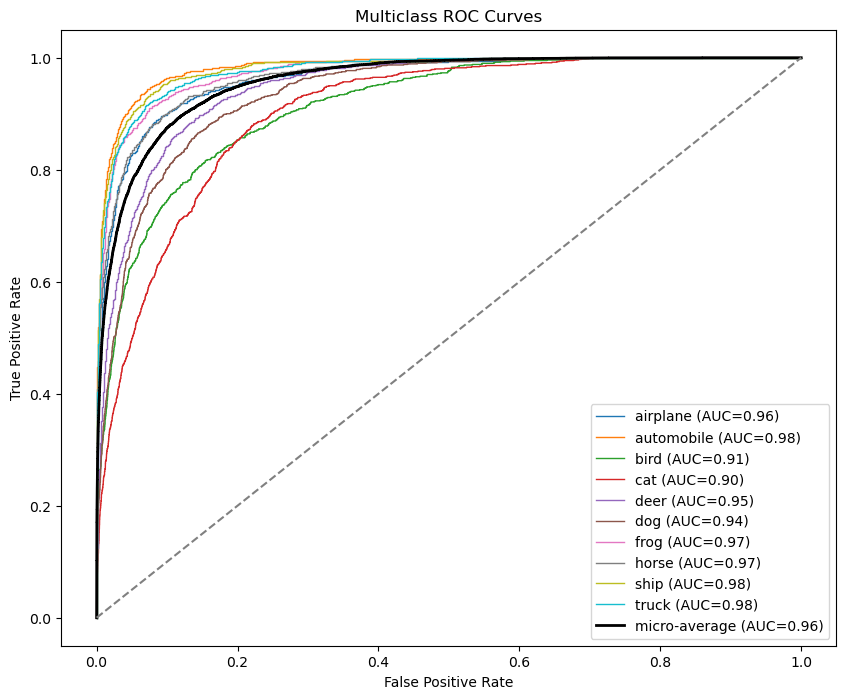

ARI: 0.0430, NMI: 0.0850, Silhouette: 0.0659
Clustering-based accuracy (majority mapping): 0.2226
            method  accuracy       ARI      NMI  ROC_AUC_macro
0   Supervised CNN    0.7018       NaN      NaN       0.954892
1  KMeans (mapped)    0.2226  0.043011  0.08505            NaN


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Input
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_curve, auc, roc_auc_score,
    adjusted_rand_score, normalized_mutual_info_score, silhouette_score
)
from sklearn.preprocessing import label_binarize
import seaborn as sns
from collections import Counter, defaultdict
import pandas as pd

# Load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = y_train.ravel(); y_test = y_test.ravel()
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

# Model with explicit Input to avoid warning
model = Sequential([
    Input(shape=(32,32,3)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train_cat, epochs=10, batch_size=64, validation_data=(X_test, y_test_cat), verbose=2)

# Supervised evaluation
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)
supervised_acc = accuracy_score(y_test, y_pred)
print("Supervised accuracy:", supervised_acc)
print(classification_report(y_test, y_pred, target_names=class_names))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,7)); sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Supervised CNN'); plt.show()

# Multiclass ROC/AUC (One-vs-Rest)
y_test_bin = label_binarize(y_test, classes=range(10))
fpr = dict(); tpr = dict(); roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# micro and macro AUC
roc_auc_micro = roc_auc_score(y_test_bin, y_pred_proba, average='micro', multi_class='ovr')
roc_auc_macro = roc_auc_score(y_test_bin, y_pred_proba, average='macro', multi_class='ovr')
print(f"ROC AUC (micro): {roc_auc_micro:.4f}, (macro): {roc_auc_macro:.4f}")

# Plot ROC curves (per-class + micro)
plt.figure(figsize=(10,8))
for i in range(10):
    plt.plot(fpr[i], tpr[i], lw=1, label=f"{class_names[i]} (AUC={roc_auc[i]:.2f})")
# micro-avg
fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_pred_proba.ravel())
plt.plot(fpr_micro, tpr_micro, color='k', lw=2, label=f"micro-average (AUC={roc_auc_micro:.2f})")
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('Multiclass ROC Curves'); plt.legend(loc='lower right'); plt.show()

# Unsupervised: PCA + KMeans
X_flat = X_test.reshape(X_test.shape[0], -1)
pca = PCA(n_components=50, random_state=42); X_pca = pca.fit_transform(X_flat)
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10); cluster_labels = kmeans.fit_predict(X_pca)

# Clustering metrics
ari = adjusted_rand_score(y_test, cluster_labels)
nmi = normalized_mutual_info_score(y_test, cluster_labels)
sil = silhouette_score(X_pca, cluster_labels)
print(f"ARI: {ari:.4f}, NMI: {nmi:.4f}, Silhouette: {sil:.4f}")

# Map clusters -> majority label and compute clustering-based accuracy
cluster_to_labels = defaultdict(list)
for cl, true in zip(cluster_labels, y_test): cluster_to_labels[cl].append(true)
cluster_majority = {cl: Counter(lbls).most_common(1)[0][0] for cl,lbls in cluster_to_labels.items()}
cluster_mapped_pred = np.array([cluster_majority[cl] for cl in cluster_labels])
cluster_acc = accuracy_score(y_test, cluster_mapped_pred)
print("Clustering-based accuracy (majority mapping):", cluster_acc)

# Summary table
df = pd.DataFrame({
    'method': ['Supervised CNN', 'KMeans (mapped)'],
    'accuracy': [supervised_acc, cluster_acc],
    'ARI': [np.nan, ari],
    'NMI': [np.nan, nmi],
    'ROC_AUC_macro': [roc_auc_macro, np.nan]
})
print(df)

Training CNN...
Epoch 1/10
782/782 - 19s - 25ms/step - accuracy: 0.3872 - loss: 1.6738 - val_accuracy: 0.5245 - val_loss: 1.3596
Epoch 2/10
782/782 - 21s - 27ms/step - accuracy: 0.5164 - loss: 1.3507 - val_accuracy: 0.5937 - val_loss: 1.1492
Epoch 3/10
782/782 - 18s - 23ms/step - accuracy: 0.5679 - loss: 1.2201 - val_accuracy: 0.6314 - val_loss: 1.0589
Epoch 4/10
782/782 - 18s - 23ms/step - accuracy: 0.6028 - loss: 1.1328 - val_accuracy: 0.6553 - val_loss: 0.9956
Epoch 5/10
782/782 - 19s - 25ms/step - accuracy: 0.6238 - loss: 1.0692 - val_accuracy: 0.6600 - val_loss: 0.9626
Epoch 6/10
782/782 - 19s - 24ms/step - accuracy: 0.6440 - loss: 1.0170 - val_accuracy: 0.6663 - val_loss: 0.9609
Epoch 7/10
782/782 - 18s - 23ms/step - accuracy: 0.6586 - loss: 0.9739 - val_accuracy: 0.6840 - val_loss: 0.9198
Epoch 8/10
782/782 - 18s - 23ms/step - accuracy: 0.6713 - loss: 0.9369 - val_accuracy: 0.6928 - val_loss: 0.8900
Epoch 9/10
782/782 - 19s - 24ms/step - accuracy: 0.6829 - loss: 0.8965 - val_acc

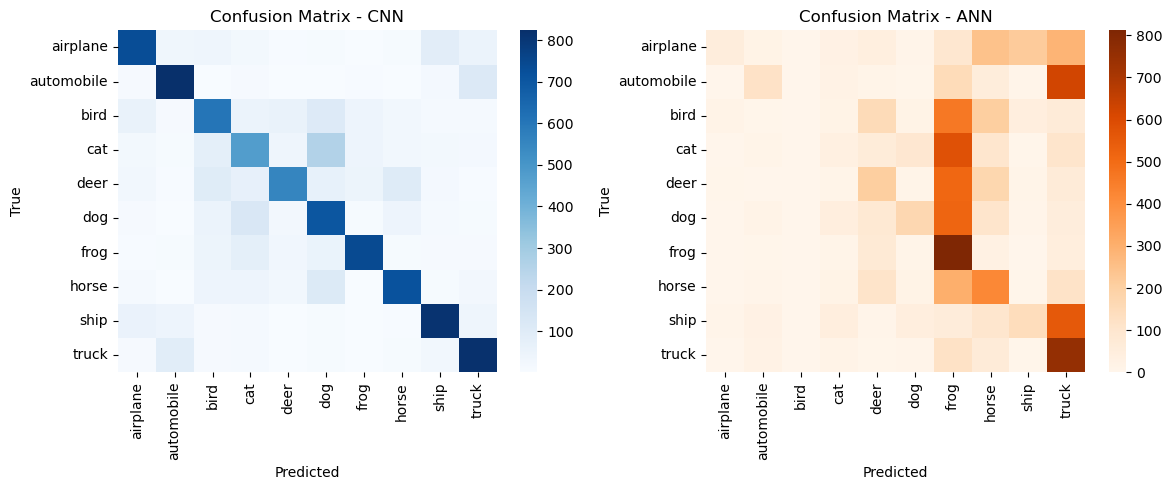

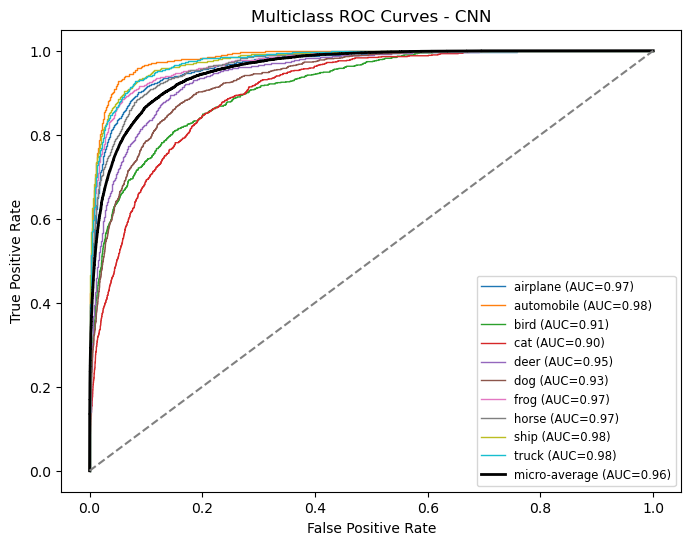

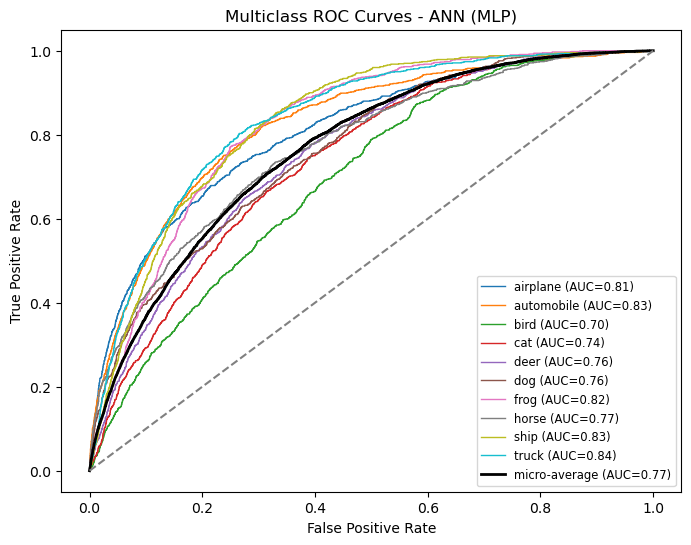


Comparison:
            method  accuracy  roc_auc_micro  roc_auc_macro       ARI      NMI
0              CNN    0.6983       0.956483       0.953677       NaN      NaN
1        ANN (MLP)    0.2724       0.767168       0.785550       NaN      NaN
2  KMeans (mapped)    0.2226            NaN            NaN  0.043011  0.08505

Best method for image classification on CIFAR-10 (by accuracy): CNN


In [13]:
# CIFAR-10: Supervised CNN, Supervised ANN (MLP), Unsupervised KMeans + metrics & ROC
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, defaultdict
import pandas as pd

from tensorflow.keras import Input
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import label_binarize
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_curve, auc, roc_auc_score,
    adjusted_rand_score, normalized_mutual_info_score, silhouette_score
)

# -------------------------
# Load and prepare data
# -------------------------
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = y_train.ravel(); y_test = y_test.ravel()
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

# -------------------------
# Supervised model 1: CNN
# -------------------------
cnn = Sequential([
    Input(shape=(32,32,3)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
cnn.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
print("Training CNN...")
cnn.fit(X_train, y_train_cat, epochs=10, batch_size=64, validation_data=(X_test, y_test_cat), verbose=2)
y_pred_proba_cnn = cnn.predict(X_test)
y_pred_cnn = np.argmax(y_pred_proba_cnn, axis=1)
acc_cnn = accuracy_score(y_test, y_pred_cnn)

# -------------------------
# Supervised model 2: ANN (MLP)
# -------------------------
ann = Sequential([
    Input(shape=(32,32,3)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
ann.compile(optimizer=Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])
print("Training ANN (MLP)...")
ann.fit(X_train, y_train_cat, epochs=10, batch_size=128, validation_data=(X_test, y_test_cat), verbose=2)
y_pred_proba_ann = ann.predict(X_test)
y_pred_ann = np.argmax(y_pred_proba_ann, axis=1)
acc_ann = accuracy_score(y_test, y_pred_ann)

# -------------------------
# Unsupervised: PCA + KMeans
# -------------------------
X_flat = X_test.reshape(X_test.shape[0], -1)
pca = PCA(n_components=50, random_state=42)
X_pca = pca.fit_transform(X_flat)
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_pca)

ari = adjusted_rand_score(y_test, cluster_labels)
nmi = normalized_mutual_info_score(y_test, cluster_labels)
sil = silhouette_score(X_pca, cluster_labels)
# Map clusters to majority labels for rough accuracy
cluster_to_labels = defaultdict(list)
for cl, true in zip(cluster_labels, y_test):
    cluster_to_labels[cl].append(true)
cluster_majority = {cl: Counter(lbls).most_common(1)[0][0] for cl, lbls in cluster_to_labels.items()}
cluster_mapped_pred = np.array([cluster_majority[cl] for cl in cluster_labels])
acc_kmeans_mapped = accuracy_score(y_test, cluster_mapped_pred)

# -------------------------
# Metrics: classification reports & confusion matrices
# -------------------------
print("\n--- Supervised CNN ---")
print(f"Accuracy: {acc_cnn:.4f}")
print(classification_report(y_test, y_pred_cnn, target_names=class_names))

print("\n--- Supervised ANN (MLP) ---")
print(f"Accuracy: {acc_ann:.4f}")
print(classification_report(y_test, y_pred_ann, target_names=class_names))

print("\n--- KMeans (mapped) ---")
print(f"Mapped accuracy: {acc_kmeans_mapped:.4f}")
print(f"ARI: {ari:.4f}, NMI: {nmi:.4f}, Silhouette: {sil:.4f}")

# Confusion matrix for CNN and ANN
cm_cnn = confusion_matrix(y_test, y_pred_cnn)
cm_ann = confusion_matrix(y_test, y_pred_ann)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.heatmap(cm_cnn, annot=False, cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - CNN'); plt.xlabel('Predicted'); plt.ylabel('True')

plt.subplot(1,2,2)
sns.heatmap(cm_ann, annot=False, cmap='Oranges', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - ANN'); plt.xlabel('Predicted'); plt.ylabel('True')
plt.tight_layout()
plt.show()

# -------------------------
# ROC / AUC: multiclass (one-vs-rest) for CNN and ANN
# -------------------------
y_test_bin = label_binarize(y_test, classes=range(10))

def compute_plot_roc(y_true_bin, y_score, model_name):
    fpr = dict(); tpr = dict(); roc_auc = dict()
    for i in range(y_true_bin.shape[1]):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    roc_auc_micro = roc_auc_score(y_true_bin, y_score, average='micro', multi_class='ovr')
    roc_auc_macro = roc_auc_score(y_true_bin, y_score, average='macro', multi_class='ovr')
    # Plot a subset of class ROC curves to keep plot readable
    plt.figure(figsize=(8,6))
    for i in range(10):
        plt.plot(fpr[i], tpr[i], lw=1, label=f"{class_names[i]} (AUC={roc_auc[i]:.2f})")
    fpr_micro, tpr_micro, _ = roc_curve(y_true_bin.ravel(), y_score.ravel())
    plt.plot(fpr_micro, tpr_micro, color='k', lw=2, label=f"micro-average (AUC={roc_auc_micro:.2f})")
    plt.plot([0,1],[0,1],'--', color='gray')
    plt.title(f"Multiclass ROC Curves - {model_name}")
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right', fontsize='small')
    plt.show()
    return roc_auc_micro, roc_auc_macro

roc_cnn_micro, roc_cnn_macro = compute_plot_roc(y_test_bin, y_pred_proba_cnn, "CNN")
roc_ann_micro, roc_ann_macro = compute_plot_roc(y_test_bin, y_pred_proba_ann, "ANN (MLP)")

# -------------------------
# Final comparison table & verdict
# -------------------------
results = pd.DataFrame({
    'method': ['CNN', 'ANN (MLP)', 'KMeans (mapped)'],
    'accuracy': [acc_cnn, acc_ann, acc_kmeans_mapped],
    'roc_auc_micro': [roc_cnn_micro, roc_ann_micro, np.nan],
    'roc_auc_macro': [roc_cnn_macro, roc_ann_macro, np.nan],
    'ARI': [np.nan, np.nan, ari],
    'NMI': [np.nan, np.nan, nmi]
})
print("\nComparison:")
print(results)

best_method = results.loc[results['accuracy'].idxmax(), 'method']
print(f"\nBest method for image classification on CIFAR-10 (by accuracy): {best_method}")

Training CNN...
Epoch 1/10
782/782 - 25s - 32ms/step - accuracy: 0.4168 - loss: 1.6062 - val_accuracy: 0.5659 - val_loss: 1.2359
Epoch 2/10
782/782 - 22s - 29ms/step - accuracy: 0.5419 - loss: 1.2901 - val_accuracy: 0.5802 - val_loss: 1.1782
Epoch 3/10
782/782 - 22s - 29ms/step - accuracy: 0.5869 - loss: 1.1702 - val_accuracy: 0.6474 - val_loss: 1.0038
Epoch 4/10
782/782 - 24s - 30ms/step - accuracy: 0.6166 - loss: 1.0894 - val_accuracy: 0.6604 - val_loss: 0.9643
Epoch 5/10
782/782 - 24s - 31ms/step - accuracy: 0.6352 - loss: 1.0264 - val_accuracy: 0.6821 - val_loss: 0.9132
Epoch 6/10
782/782 - 25s - 32ms/step - accuracy: 0.6546 - loss: 0.9780 - val_accuracy: 0.6779 - val_loss: 0.9326
Epoch 7/10
782/782 - 22s - 29ms/step - accuracy: 0.6678 - loss: 0.9401 - val_accuracy: 0.6964 - val_loss: 0.8741
Epoch 8/10
782/782 - 23s - 29ms/step - accuracy: 0.6818 - loss: 0.9002 - val_accuracy: 0.7043 - val_loss: 0.8553
Epoch 9/10
782/782 - 24s - 31ms/step - accuracy: 0.6957 - loss: 0.8571 - val_acc

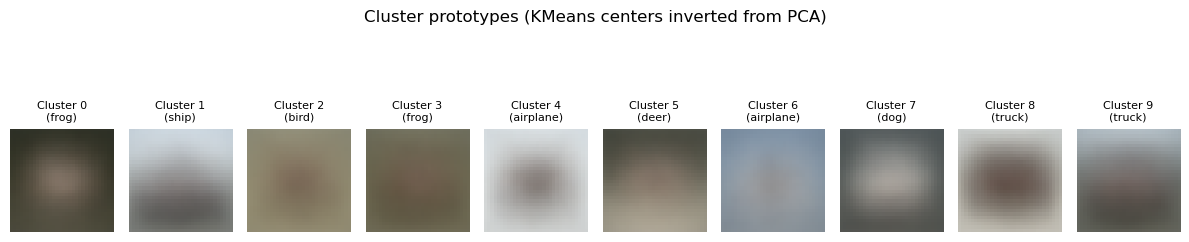

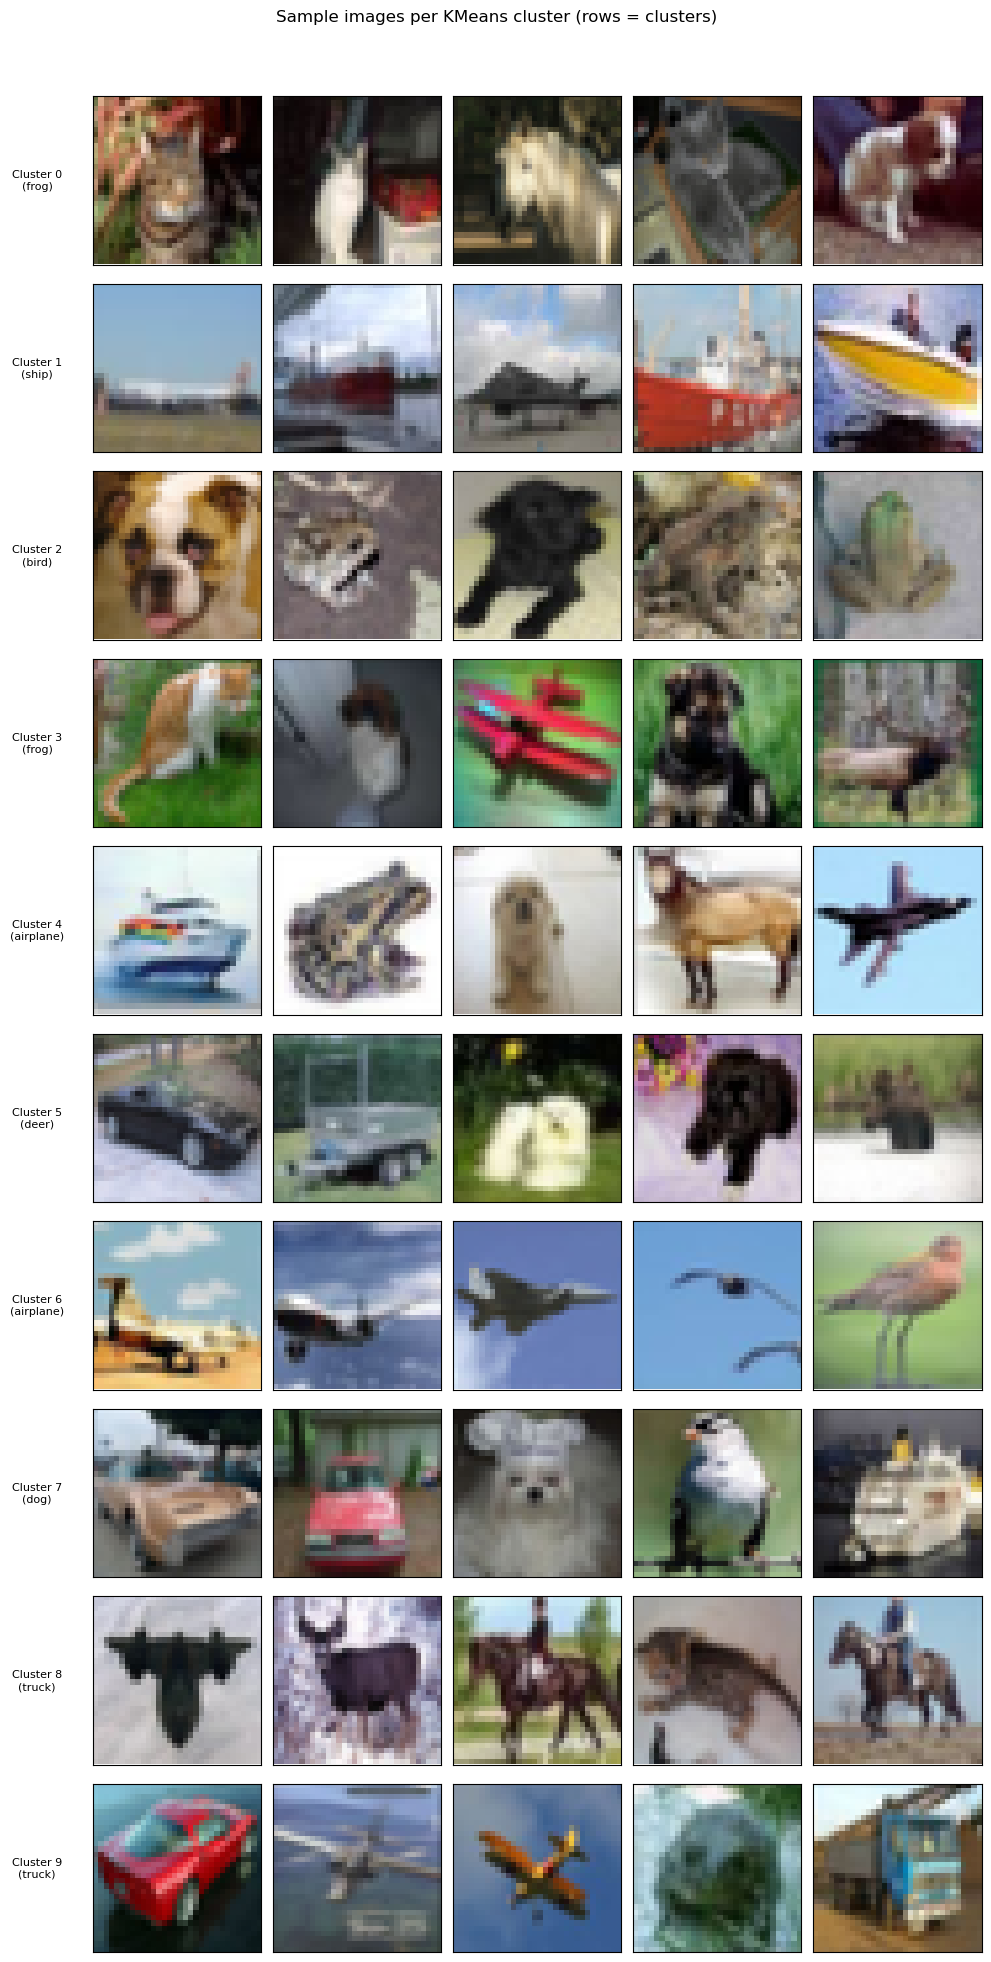

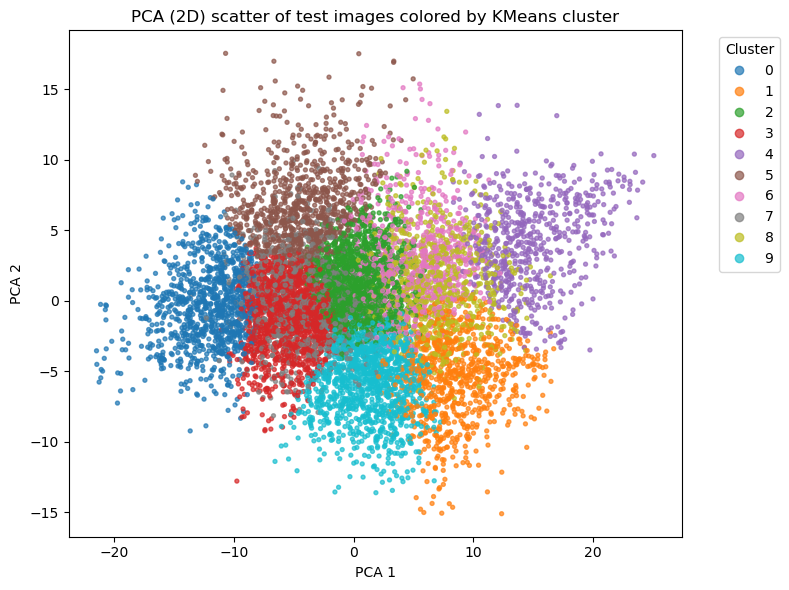

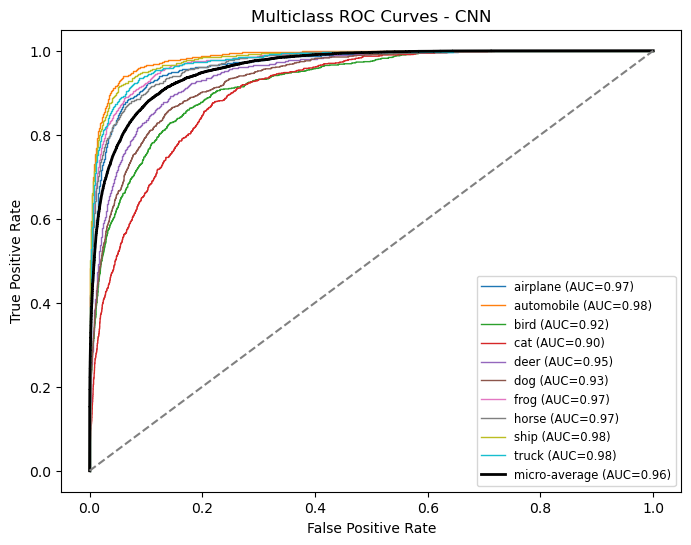

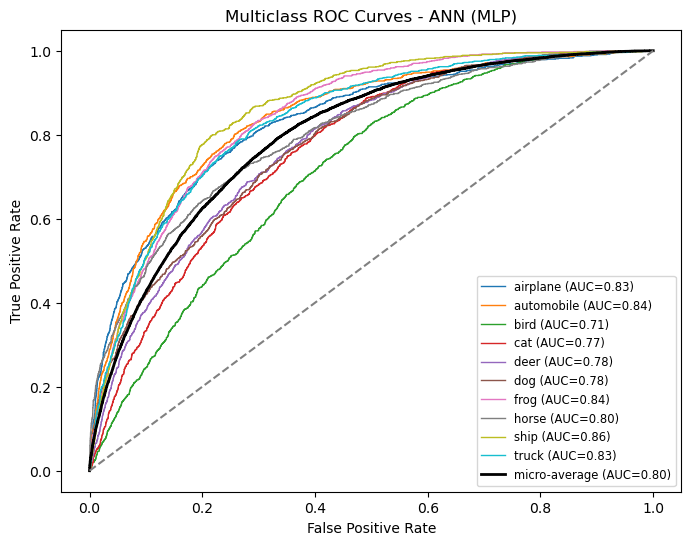


--- Supervised CNN ---
Accuracy: 0.7035
              precision    recall  f1-score   support

    airplane       0.69      0.78      0.73      1000
  automobile       0.85      0.81      0.83      1000
        bird       0.59      0.60      0.60      1000
         cat       0.51      0.53      0.52      1000
        deer       0.66      0.63      0.65      1000
         dog       0.60      0.64      0.62      1000
        frog       0.87      0.67      0.76      1000
       horse       0.75      0.77      0.76      1000
        ship       0.75      0.84      0.80      1000
       truck       0.82      0.77      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000


--- Supervised ANN (MLP) ---
Accuracy: 0.3341
              precision    recall  f1-score   support

    airplane       0.51      0.27      0.36      1000
  automobile       0.34      0.65      0.45 

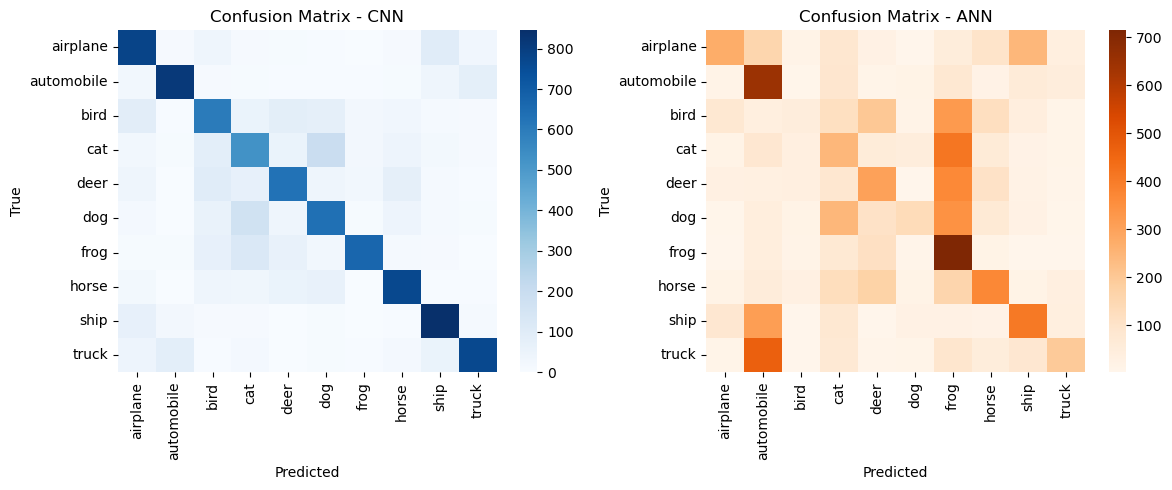


Comparison:
            method  accuracy  roc_auc_micro  roc_auc_macro       ARI      NMI
0              CNN    0.7035       0.958923       0.956115       NaN      NaN
1        ANN (MLP)    0.3341       0.800240       0.804830       NaN      NaN
2  KMeans (mapped)    0.2226            NaN            NaN  0.043011  0.08505

Best method for image classification on CIFAR-10 (by accuracy): CNN


In [15]:
# CIFAR-10: CNN, ANN (MLP), KMeans clustering with image-cluster outputs and cluster prototypes
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, defaultdict
import pandas as pd

from tensorflow.keras import Input
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import label_binarize
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_curve, auc, roc_auc_score,
    adjusted_rand_score, normalized_mutual_info_score, silhouette_score
)

# -------------------------
# Load and prepare data
# -------------------------
np.random.seed(42)
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = y_train.ravel(); y_test = y_test.ravel()
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

# -------------------------
# Supervised model 1: CNN
# -------------------------
cnn = Sequential([
    Input(shape=(32,32,3)),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
cnn.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
print("Training CNN...")
cnn.fit(X_train, y_train_cat, epochs=10, batch_size=64, validation_data=(X_test, y_test_cat), verbose=2)
y_pred_proba_cnn = cnn.predict(X_test)
y_pred_cnn = np.argmax(y_pred_proba_cnn, axis=1)
acc_cnn = accuracy_score(y_test, y_pred_cnn)

# -------------------------
# Supervised model 2: ANN (MLP)
# -------------------------
ann = Sequential([
    Input(shape=(32,32,3)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
ann.compile(optimizer=Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])
print("Training ANN (MLP)...")
ann.fit(X_train, y_train_cat, epochs=10, batch_size=128, validation_data=(X_test, y_test_cat), verbose=2)
y_pred_proba_ann = ann.predict(X_test)
y_pred_ann = np.argmax(y_pred_proba_ann, axis=1)
acc_ann = accuracy_score(y_test, y_pred_ann)

# -------------------------
# Unsupervised: PCA + KMeans
# -------------------------
# Flatten images for PCA/KMeans
X_flat = X_test.reshape(X_test.shape[0], -1)

# PCA to reduce dimensionality before clustering (improves speed & quality)
pca = PCA(n_components=50, random_state=42)
X_pca = pca.fit_transform(X_flat)

# KMeans clustering
k = 10
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_pca)

# Clustering metrics
ari = adjusted_rand_score(y_test, cluster_labels)
nmi = normalized_mutual_info_score(y_test, cluster_labels)
sil = silhouette_score(X_pca, cluster_labels)

# Map clusters -> majority label and compute clustering-based accuracy
cluster_to_labels = defaultdict(list)
for cl, true in zip(cluster_labels, y_test):
    cluster_to_labels[cl].append(true)
cluster_majority = {cl: Counter(lbls).most_common(1)[0][0] for cl, lbls in cluster_to_labels.items()}
cluster_mapped_pred = np.array([cluster_majority[cl] for cl in cluster_labels])
acc_kmeans_mapped = accuracy_score(y_test, cluster_mapped_pred)

# -------------------------
# Cluster prototypes (visualize cluster centers)
# -------------------------
# KMeans cluster centers are in PCA space; invert PCA to image space
centers_pca = kmeans.cluster_centers_                # shape (k, n_components)
centers_flat = pca.inverse_transform(centers_pca)    # shape (k, 32*32*3)
centers_images = centers_flat.reshape((k, 32, 32, 3))
# Clip values to [0,1] for display
centers_images = np.clip(centers_images, 0.0, 1.0)

# -------------------------
# Visualizations: clusters and prototypes
# -------------------------
# 1) Show cluster prototypes (one image per cluster)
plt.figure(figsize=(12, 3))
for cl in range(k):
    ax = plt.subplot(1, k, cl+1)
    ax.imshow(centers_images[cl])
    ax.set_title(f"Cluster {cl}\n({class_names[cluster_majority.get(cl,0)]})", fontsize=8)
    ax.axis('off')
plt.suptitle("Cluster prototypes (KMeans centers inverted from PCA)")
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()

# 2) Show sample images per cluster (rows = clusters)
samples_per_cluster = 5
plt.figure(figsize=(samples_per_cluster * 2, k * 2))
for cl in range(k):
    idxs = np.where(cluster_labels == cl)[0]
    if len(idxs) == 0:
        # empty cluster
        for i in range(samples_per_cluster):
            ax = plt.subplot(k, samples_per_cluster, cl * samples_per_cluster + i + 1)
            ax.axis('off')
        continue
    chosen = np.random.choice(idxs, min(samples_per_cluster, len(idxs)), replace=False)
    for i, idx in enumerate(chosen):
        ax = plt.subplot(k, samples_per_cluster, cl * samples_per_cluster + i + 1)
        ax.imshow(X_test[idx])
        ax.set_xticks([]); ax.set_yticks([])
        if i == 0:
            ax.set_ylabel(f"Cluster {cl}\n({class_names[cluster_majority.get(cl,0)]})", rotation=0, labelpad=40, va='center', fontsize=8)
plt.suptitle("Sample images per KMeans cluster (rows = clusters)")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# 3) PCA scatter colored by cluster (first two PCA components)
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=cluster_labels, cmap='tab10', s=8, alpha=0.7)
plt.legend(*scatter.legend_elements(), title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("PCA (2D) scatter of test images colored by KMeans cluster")
plt.xlabel("PCA 1"); plt.ylabel("PCA 2")
plt.tight_layout()
plt.show()

# -------------------------
# ROC / AUC: multiclass (one-vs-rest) for CNN and ANN
# -------------------------
y_test_bin = label_binarize(y_test, classes=range(10))

def compute_plot_roc(y_true_bin, y_score, model_name, plot=True):
    fpr = dict(); tpr = dict(); roc_auc = dict()
    for i in range(y_true_bin.shape[1]):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    roc_auc_micro = roc_auc_score(y_true_bin, y_score, average='micro', multi_class='ovr')
    roc_auc_macro = roc_auc_score(y_true_bin, y_score, average='macro', multi_class='ovr')
    if plot:
        plt.figure(figsize=(8,6))
        for i in range(y_true_bin.shape[1]):
            plt.plot(fpr[i], tpr[i], lw=1, label=f"{class_names[i]} (AUC={roc_auc[i]:.2f})")
        fpr_micro, tpr_micro, _ = roc_curve(y_true_bin.ravel(), y_score.ravel())
        plt.plot(fpr_micro, tpr_micro, color='k', lw=2, label=f"micro-average (AUC={roc_auc_micro:.2f})")
        plt.plot([0,1],[0,1],'--', color='gray')
        plt.title(f"Multiclass ROC Curves - {model_name}")
        plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right', fontsize='small')
        plt.show()
    return roc_auc_micro, roc_auc_macro

roc_cnn_micro, roc_cnn_macro = compute_plot_roc(y_test_bin, y_pred_proba_cnn, "CNN")
roc_ann_micro, roc_ann_macro = compute_plot_roc(y_test_bin, y_pred_proba_ann, "ANN (MLP)")

# -------------------------
# Metrics: classification reports & confusion matrices
# -------------------------
print("\n--- Supervised CNN ---")
print(f"Accuracy: {acc_cnn:.4f}")
print(classification_report(y_test, y_pred_cnn, target_names=class_names))

print("\n--- Supervised ANN (MLP) ---")
print(f"Accuracy: {acc_ann:.4f}")
print(classification_report(y_test, y_pred_ann, target_names=class_names))

print("\n--- KMeans (mapped) ---")
print(f"Mapped accuracy: {acc_kmeans_mapped:.4f}")
print(f"ARI: {ari:.4f}, NMI: {nmi:.4f}, Silhouette: {sil:.4f}")

# Confusion matrix for CNN and ANN
cm_cnn = confusion_matrix(y_test, y_pred_cnn)
cm_ann = confusion_matrix(y_test, y_pred_ann)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.heatmap(cm_cnn, annot=False, cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - CNN'); plt.xlabel('Predicted'); plt.ylabel('True')

plt.subplot(1,2,2)
sns.heatmap(cm_ann, annot=False, cmap='Oranges', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - ANN'); plt.xlabel('Predicted'); plt.ylabel('True')
plt.tight_layout()
plt.show()

# -------------------------
# Final comparison table & verdict
# -------------------------
results = pd.DataFrame({
    'method': ['CNN', 'ANN (MLP)', 'KMeans (mapped)'],
    'accuracy': [acc_cnn, acc_ann, acc_kmeans_mapped],
    'roc_auc_micro': [roc_cnn_micro, roc_ann_micro, np.nan],
    'roc_auc_macro': [roc_cnn_macro, roc_ann_macro, np.nan],
    'ARI': [np.nan, np.nan, ari],
    'NMI': [np.nan, np.nan, nmi]
})
print("\nComparison:")
print(results)

best_method = results.loc[results['accuracy'].idxmax(), 'method']
print(f"\nBest method for image classification on CIFAR-10 (by accuracy): {best_method}")